## Importando bibliotecas que usaremos

In [88]:
# Bibliotecas para ler/manipular/ver nossos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo
from mlxtend.plotting import plot_decision_regions

## Análise básica do dataset

Lendo o arquivo csv

In [89]:
df = pd.read_csv('PhishingData.csv')

Printando as primeiras linhas

In [90]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


Vendo algumas informações com `.info()` e `.describe()`

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [92]:
df.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Aplicando modelo de Machine Learning: KNN

Definindo colunas de features (X) e targets (y)

In [93]:
# Colunas dos "features"
X = np.array(df.drop(['Result'], 1))

# Colunas do "target"
y = np.array(df['Result'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25536\146368618.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Result'], 1))


Separando o Dataset em treino e teste
Como os dados já foram categorizados anteriormente não há a necessidade de fazer a normalização
Pois os dados já estão normalizados (os dados sempre são -1, 0 ou 1)

In [105]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                                    X, y, test_size = 0.2, random_state=0)

Definindo nosso modelo (KNN)

In [95]:
# clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf = neighbors.KNeighborsClassifier(n_neighbors=8, metric='manhattan')
#o motivo de utilizar-se o manhattan com k=8 estara nas linhas a seguir

Treinando nosso modelo

In [96]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

Testando sua acurácia no dataset de teste

In [97]:
accuracy = clf.score(X_test, y_test)
print('Accuracy: ' + str(accuracy * 100) + ' %')

Accuracy: 88.19188191881919 %


Gerando Confusion Matrix

0.8819188191881919

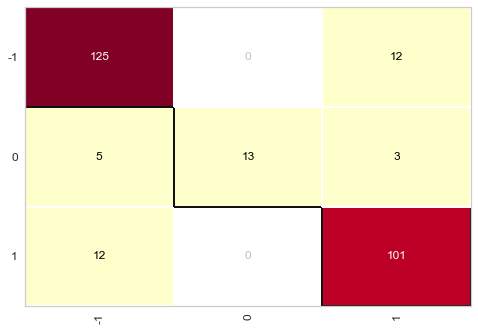

In [98]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Gerando a "Classification Report"

In [99]:
from sklearn.metrics import classification_report
previsoes_classificadas = clf.predict(X_test)
print(classification_report(y_test, previsoes_classificadas))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90       137
           0       1.00      0.62      0.76        21
           1       0.87      0.89      0.88       113

    accuracy                           0.88       271
   macro avg       0.92      0.81      0.85       271
weighted avg       0.89      0.88      0.88       271



## Otimizando os parâmetros de treinamento
* O valor de 'k' ideal
* A métrica ideal a ser utilizada

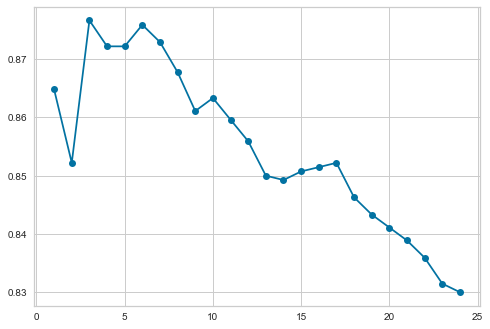

In [101]:
#incluindo mais uma função do sklearn
from sklearn.model_selection import GridSearchCV 

#criando uma lista de 1 a 25 para testes de possiveis 'k'
#utilizando métrica da distancia euclidiana
k_list = list(range(1,25))
metric_list = [ 'euclidean']
parameters = {'n_neighbors':k_list,'metric':metric_list}

#aqui é testado os parametros com base no score de acurácia
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y) 

#obtedo o resultado e armazenando em um dataframe
scores = pd.DataFrame(grid.cv_results_)

#plotando no gráfico para visualização
plt.plot(k_list,scores['mean_test_score'],marker='o')

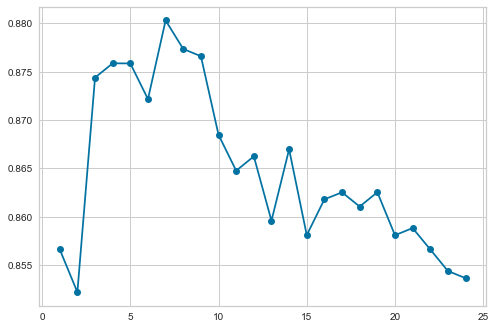

In [102]:
#incluindo mais uma função do sklearn
from sklearn.model_selection import GridSearchCV 

#criando uma lista de 1 a 25 para testes de possiveis 'k'
#utilizando métrica de distancia de hamming
k_list = list(range(1,25))
metric_list = ['hamming']
parameters = {'n_neighbors':k_list,'metric':metric_list}

#aqui é testado os parametros com base no score de acurácia
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y) 

#obtedo o resultado e armazenando em um dataframe
scores = pd.DataFrame(grid.cv_results_)

#plotando no gráfico para visualização
plt.plot(k_list,scores['mean_test_score'],marker='o')

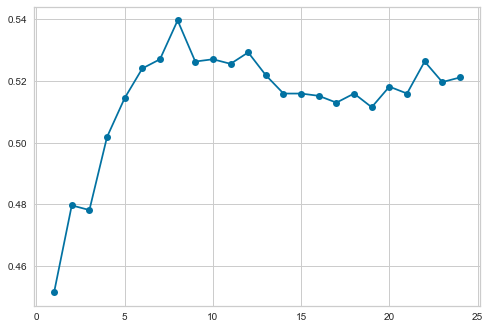

In [103]:
#incluindo mais uma função do sklearn
from sklearn.model_selection import GridSearchCV 

#criando uma lista de 1 a 25 para testes de possiveis 'k'
#utilizando métrica de distancia de matching
k_list = list(range(1,25))
metric_list = ['matching']
parameters = {'n_neighbors':k_list,'metric':metric_list}

#aqui é testado os parametros com base no score de acurácia
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y) 

#obtedo o resultado e armazenando em um dataframe
scores = pd.DataFrame(grid.cv_results_)

#plotando no gráfico para visualização
plt.plot(k_list,scores['mean_test_score'],marker='o')

In [104]:
#portanto dá pra fazer o teste
#das duas coisas ao mesmo tempo
#para saber qual K e qual metrica trará o melhor resultado

#gerando lista com várias métricas para teste
metric_list = [ 'euclidean',
                'hamming',
                'matching',
                'minkowski',
                'chebyshev',
                'manhattan',
                'jaccard',
                'dice',
                'kulsinski',
                'rogerstanimoto',
                'russellrao',
                'sokalmichener',
                'sokalsneath',
                'braycurtis',
                'canberra']

#gerando lista com k de 1 ate 25
k_list = list(range(1,25))

#gerando o dicionario com todos os parametros que deseja testar entre si
parameters = {'n_neighbors':k_list,'metric':metric_list}

#aqui mudamos o cv de 5 (que é o padrão) para 10
#na tentativa e erro percebeu-se uma melhora quando cv = 10
#por meio da estratégia Kfold o dataset é dividido entre 10 partes
#para fazer 10 testes diferentes
#entre os dados de treino e os dados de teste
#baseando-se sempre na acurácia
grid = GridSearchCV(clf,parameters,cv=10,scoring='accuracy')
grid.fit(X,y) #treinando
scores = pd.DataFrame(grid.cv_results_) #capturando os score em um dataframe

# capturando logo o melhor parametro ja que o gráfico agora
# não poderá ser gerado por excesso de dados
print("Melhor solução: "+ str(grid.best_params_))


Melhor solução: {'metric': 'manhattan', 'n_neighbors': 8}
